In [1]:
import pandas as pd

# <span style="color:#FF8800"> Load training data </span>

In [2]:
train_df = pd.read_csv("datasets/train_data.tsv", 
                       sep = "\t",
                       usecols = ["label","label_binary","text"]
                      )

In [8]:
print(train_df.shape)
train_df.sample(3)

(15928, 3)


,label,label_binary,text
2846,No_Propaganda,No_Propaganda,dossier was interlaced with condemnations of t...
2735,No_Propaganda,No_Propaganda,make?\nMr Cruz sent the text of his letter (wr...
6375,No_Propaganda,No_Propaganda,"into dollars, an investigative report by the S..."


> ### The training data, which was created in generate_data.ipynb, contains +15,900 samples with binary and multi-class labels. Here we'll focus on multi-class classification.

# <span style="color:#FF8800"> Create, fit, & predict with Dummy Classifier
> ### Creating a simple baseline model is a good first step for a classification or even regression problem (e.g. predict the mean value). It offers some perspective on the difficulty of the problem as well as a way to gauge how much "value" a more sophisticated model offers. Here we'll use a stratified approach so the classifier will offer some predictions across various labels instead of only predicting the most common label.

In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV

In [10]:
dummy = DummyClassifier(strategy = "stratified", random_state = 8)

In [11]:
dummy.fit(train_df["text"],train_df["label"]) # fit the model to the data

DummyClassifier(constant=None, random_state=8, strategy='stratified')

In [14]:
dev_df = pd.read_csv("datasets/dev_data.tsv", 
                       sep = "\t",
                       usecols = ["label","label_binary","text"]
                      )

In [15]:
print(dev_df.shape)
dev_df.sample(3)

(2850, 3)


,label,label_binary,text
1857,Loaded_Language,Propaganda,total dictatorship
124,Loaded_Language,Propaganda,boldly
1086,Flag-Waving,Propaganda,British girls


> ### We'll use the dev data to evaluate the performance of our model. Normally, we would split our training data so we could adjust hyperparameters and evaluate our initial models before using the limited and precious dev data. However, that's 1) not as useful for creating a dummy classifier and 2) an approach I'll outline in logistic_regression.ipynb. 

In [16]:
dummy_y_pred = dummy.predict(dev_df["text"])

> ### This deceptively simple step is where our dummy classifier generates predictions based on the fit above and the sample text from the dev data. Actually, the dummy classifier doesn't even rely on the actual text here. It's simply using the proportions of the labels found in the training data during fitting. We can highlight this fact by calling .predict on meaningless data while still getting predictions. The .predict call here is mainly used to determine how many predictions (i.e. the length of the input) to generate.

In [57]:
any_text = ["anything" for i in range(len(dev_df["text"]))]
dummy_y_pred = dummy.predict(any_text)

# <span style="color:#FF8800"> Visualizing results

In [69]:
from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import numpy as np

In [70]:
labels = list(dummy.classes_)
cm = confusion_matrix(dev_df["label"], dummy_y_pred, labels)

## Below is a function from user Calvin Duy Canh Tran on Stack Overflow to plot a confusion matrix with any number of labels. The confusion_matrix function above outputs an unwieldly np.ndarray which I would rather not wrestle with especially given the 15 classes involved. You can check out the original post on SO here: https://stackoverflow.com/a/50386871/1576558.

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [77]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Purples')

    plt.figure(figsize=(20, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

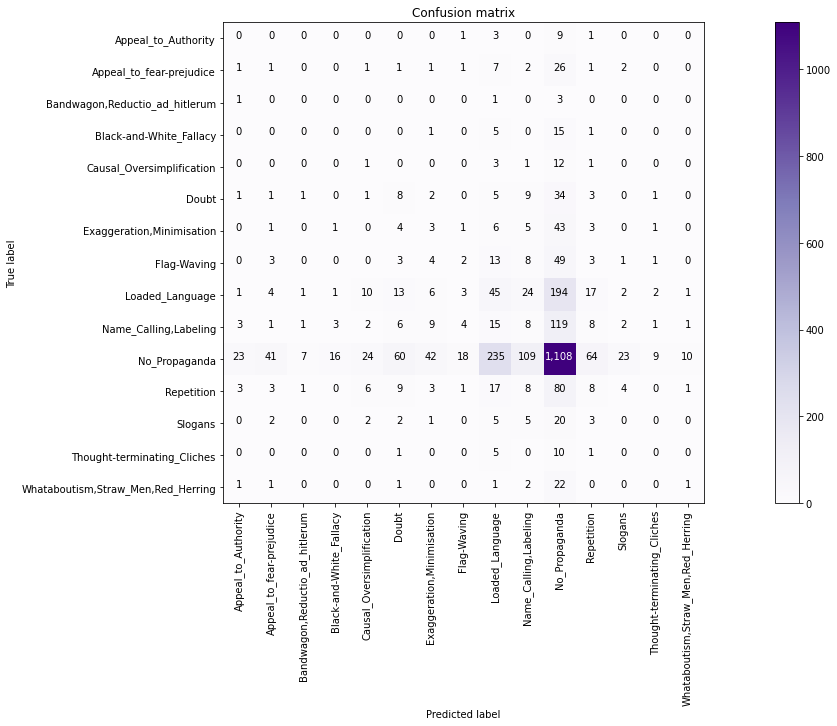

In [78]:
plot_confusion_matrix(cm = cm, target_names = labels, normalize = False)

> ### A confusion matrix visualizes the accuracy of the predictions. If a classifer had 100% accuracy then only the diagonal would contain values greater than zero. In this plot the darker purple the cell the higher the count.
> ### <span style="color:#8800ff"> We can see the dummy classifier performed best with the "No_Propaganda", "Loaded_Language", and "Name_Calling,Labeling" labels. Overall, it performed quite poorly. While our baseline is low there's a lot of room for improvement with our other models!

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(dev_df["label"], dummy_y_pred, target_names=labels))

                                    precision    recall  f1-score   support

               Appeal_to_Authority       0.00      0.00      0.00        14
          Appeal_to_fear-prejudice       0.02      0.02      0.02        44
    Bandwagon,Reductio_ad_hitlerum       0.00      0.00      0.00         5
           Black-and-White_Fallacy       0.00      0.00      0.00        22
         Causal_Oversimplification       0.02      0.06      0.03        18
                             Doubt       0.07      0.12      0.09        66
         Exaggeration,Minimisation       0.04      0.04      0.04        68
                       Flag-Waving       0.06      0.02      0.03        87
                   Loaded_Language       0.12      0.14      0.13       324
             Name_Calling,Labeling       0.04      0.04      0.04       183
                     No_Propaganda       0.64      0.62      0.63      1789
                        Repetition       0.07      0.06      0.06       144
           

> ### We can also evaluate label-specific precision, recall, and f1 score results for the dummy classifier. This is a more precise way of viewing the information contained in the plot above.
> ### <span style="color:#8800ff"> The labels where the model performed best correspond to those with the highest support (i.e. the number of actual occurrences of a label). This aligns with the stratified strategy used. However, labels with support below 29 (e.g. "Black-and-White_Fallacy") are not predicted at all because they account for less than 1% of the data.

In [88]:
from sklearn.metrics import f1_score

In [90]:
round(f1_score(dev_df["label"], dummy_y_pred, average = 'micro'),2)

0.42

> ### <span style="color:#8800ff"> Finally, we can quantify the overall performance of the dummy classifier using one number. Here we'll use the micro f1 score which assesses the overall performance while taking class imbalance into account (e.g. performing extremely well on a couple small labels is not the same as performing decently across all labels).

# <span style="color:#FF8800"> END